In [1]:
import os
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd

In [2]:
def recentFile(prefix):
    files = [f for f in os.listdir() if f.startswith(prefix)]
    files.sort()
    return files[-1]

In [3]:
with open(recentFile("startup_versions_"), 'r') as versionfile:
    print(versionfile.read())

bash
GNU bash, version 5.0.7(1)-release (x86_64-pc-linux-gnu)
Copyright (C) 2019 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>

This is free software; you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.

node
v11.15.0

sbcl
SBCL 1.5.2

ruby
ruby 2.6.3p62 (2019-04-16 revision 67580) [x86_64-linux]

perl

This is perl 5, version 28, subversion 2 (v5.28.2) built for x86_64-linux-thread-multi

Copyright 1987-2019, Larry Wall

Perl may be copied only under the terms of either the Artistic License or the
GNU General Public License, which may be found in the Perl 5 source kit.

Complete documentation for Perl, including FAQ lists, should be found on
this system using "man perl" or "perldoc perl".  If you have access to the
Internet, point your browser at http://www.perl.org/, the Perl Home Page.


perl6
This is Rakudo version 2019.03.1 built on MoarVM version 2019.03
implementing Perl 

In [4]:
nullfile = recentFile("startup_null_")
nullfile

'startup_null_20190527163453'

In [5]:
scriptfile = recentFile("startup_script_")
scriptfile

'startup_script_20190527163453'

In [6]:
def readData(filename):
    alldata = pd.read_csv(filename, sep=" ", header=None, names=["program", "real", "user", "kernel"])
    data = alldata.groupby("program").mean()
    data["on_proc"] = data["user"] + data["kernel"]
    # return data.sort_values("on_proc")
    return data

In [7]:
nulltimes = readData(nullfile)
nulltimes

,real,user,kernel,on_proc
program,,,,
bash,0.002667,0.002400,0.000333,0.002733
deno,0.008000,0.004867,0.003133,0.008000
lua,0.001000,0.000800,0.000200,0.001000
node,0.044800,0.039267,0.006067,0.045333
perl,0.001000,0.000667,0.000333,0.001000
perl6,0.099667,0.125400,0.020467,0.145867
python2,0.033267,0.029733,0.003400,0.033133
python3,0.011667,0.010000,0.002000,0.012000
racket,0.255067,0.222267,0.031867,0.254133


In [8]:
scripttimes = readData(scriptfile)
scripttimes

,real,user,kernel,on_proc
program,,,,
bash,0.003533,0.002733,0.000800,0.003533
deno,0.008267,0.003667,0.004733,0.008400
lua,0.001000,0.000867,0.000133,0.001000
node,0.050067,0.043800,0.006733,0.050533
perl,0.001067,0.000600,0.000400,0.001000
perl6,0.114267,0.146733,0.022067,0.168800
python2,0.033000,0.029067,0.003400,0.032467
python3,0.014000,0.010533,0.003000,0.013533
racket,0.336333,0.297400,0.037333,0.334733


In [9]:
times = scripttimes[['on_proc']].join(nulltimes[['on_proc']], lsuffix="_script", rsuffix="_null")

In [10]:
def plotbars(data):
    x = np.arange(len(data))
    width = 0.4

    fig, ax = mp.subplots()
    scriptbars = ax.bar(x - width/2, data["on_proc_script"], width, label="Hello World")
    nullbars   = ax.bar(x + width/2, data["on_proc_null"],   width, label="/dev/null")

    ax.set_ylabel("Seconds")
    ax.set_xticks(x)
    ax.set_xticklabels(data.index, rotation=25)
    ax.legend()

    mp.grid(axis='y')

    mp.show()

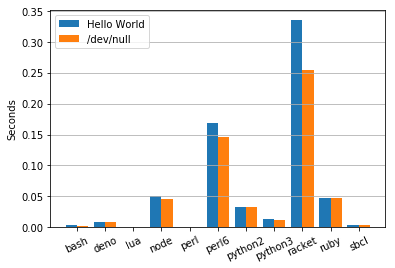

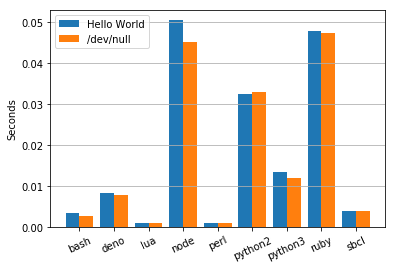

In [11]:
plotbars(times)
plotbars(times[times["on_proc_null"] <= 0.1])